# Pymaceuticals Inc.
---

### Analysis

- There seems to be a positive correlation between average tumor size and weight within the mice.
- The average sex of the mice was evenly distributed, with roughly 50% female and 50% male.
- Capomulin and Ramicane both had the largest sample sizes as well as the most success in reducing tumor size.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = study_results.merge(mouse_metadata,on='Mouse ID')
# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = df.loc[df['Mouse ID'] == 'g989',:]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_df = df.drop_duplicates(subset = ['Mouse ID','Timepoint'])

clean_df = df[(df['Mouse ID'].isin(dup_mice)) == False]
clean_df.head()
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume" : mean, 
                            "Median Tumor Volume" : median, 
                           "Tumor Volume Variance" : var, 
                           "Tumor Volume Std. Dev." : std, 
                           "Tumor Volume Std. Err." : sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

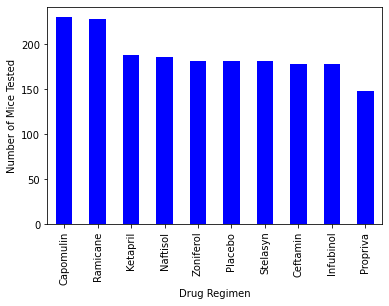

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = clean_df["Drug Regimen"].value_counts()

mice_tested.plot(kind='bar',color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

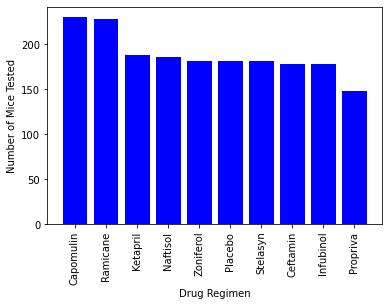

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_tested.index.values
y_axis = mice_tested.values

plt.bar(x_axis, y_axis, color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

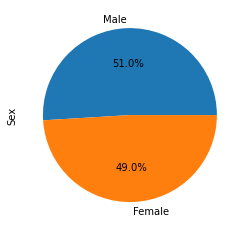

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_df['Sex'].value_counts()

mice_gender.plot.pie(y='Sex',autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

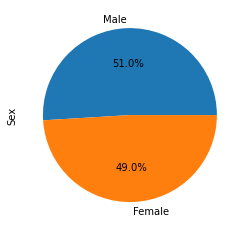

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x = mice_gender

plt.pie(x,autopct='%1.1f%%',labels = ['Male','Female'])
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse

#capo
capo_last = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_vol = pd.DataFrame(capo_last)
capo_merge = pd.merge(capo_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
capo_tumors = capo_merge['Tumor Volume (mm3)']
capo_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [15]:
#ram
ram_last = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame(ram_last)
ram_merge = pd.merge(ram_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ram_tumors = ram_merge['Tumor Volume (mm3)']
ram_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [16]:
#inf
inf_last = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_vol = pd.DataFrame(inf_last)
inf_merge = pd.merge(inf_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
inf_tumors = inf_merge['Tumor Volume (mm3)']
inf_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [17]:
#ceft
ceft_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_vol = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceft_tumors = ceft_merge['Tumor Volume (mm3)']
ceft_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [capo_tumors,ram_tumors,inf_tumors,ceft_tumors]

filter_df = clean_df.set_index('Drug Regimen')
filtered_df = filter_df.loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],:]

time_df = filtered_df.groupby('Mouse ID').max()['Timepoint']

time_df.head()
final_df = pd.merge(time_df, clean_df, on =('Mouse ID','Timepoint'))
final_filter_df = final_df.set_index('Drug Regimen')

for treatment in treatment_list:

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = final_filter_df.loc[treatment,'Tumor Volume (mm3)'].quantile([.25,.5,.75]).round(2)
    
    # add subset 
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    

    print(f"The lower quartile of {treatment} treatments is: {lowerq}")
    print(f"The upper quartile of {treatment} treatments is: {upperq}")
    print(f"The interquartile range of {treatment} treatments is: {iqr}")
    print(f"Values above {lower_bound} could be {treatment} outliers.")
    print(f"Values above {upper_bound} could be {treatment} outliers.")
    print(f"-----------------------------------")

The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values above 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
-----------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values above 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
-----------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values above 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
-----------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile

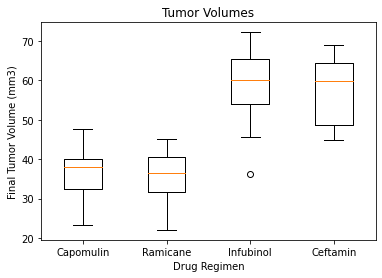

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=treatment_list)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

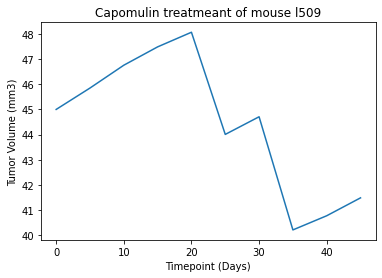

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capoline_df = capo_df.loc[capo_df["Mouse ID"] == "l509",:]
x_axis = capoline_df["Timepoint"]
tumsiz = capoline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

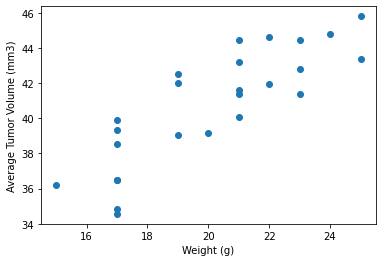

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_avg = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [23]:
model=st.linregress(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.12754359033201337)

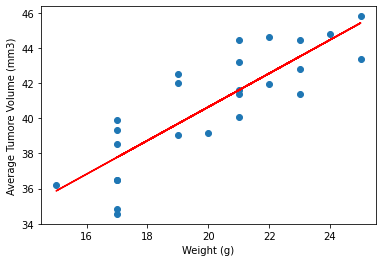

In [24]:
slope = 0.9544396890241045
intercept = 21.552160532685015

y_values = capo_avg['Weight (g)']*slope+intercept
plt.scatter(capo_avg['Weight (g)'],capo_avg['Tumor Volume (mm3)'])
plt.plot(capo_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()